<a href="https://colab.research.google.com/github/ShauryaPrakashVerma/Python_for_AI/blob/main/Travelling_Salesman_Problem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Travelling Salesman Problem**

- The Traveling Salesman Problem (TSP) is a classic problem in computer science and operations research. It asks the following question: "Given a list of cities and the distances between each pair of cities, what is the shortest possible route that visits each city exactly once and returns to the origin city?"

- Essentially, a salesperson needs to visit a set of cities and wants to find the most efficient (shortest) route to do so, starting and ending at the same city.

# Task
Implement and solve the Traveling Salesman Problem (TSP) using a brute-force approach, which includes representing cities and distances, implementing the algorithm, testing it with example data, visualizing the optimal path, and summarizing the limitations and potential future steps for handling a larger number of cities.

## Represent Cities and Distances

### Subtask:
Define a way to represent cities (e.g., as coordinates) and calculate the distances between them, typically using a distance matrix or a function to compute Euclidean distance.


**Reasoning**:
First, I'll generate the code to define example cities as coordinates, implement a Euclidean distance function, and then use it to create a distance matrix. This directly addresses instructions 1, 2, and 3 of the subtask.



In [1]:
import math
import numpy as np

# 1. Define a set of example cities as (x, y) coordinates
cities = [
    (0, 0),
    (1, 3),
    (2, 1),
    (3, 4),
    (5, 2)
]

print(f"Defined cities: {cities}")

# 2. Implement a Python function to calculate Euclidean distance
def euclidean_distance(city1, city2):
    """Calculates the Euclidean distance between two cities (coordinates)."""
    return math.sqrt((city1[0] - city2[0])**2 + (city1[1] - city2[1])**2)

# Test the distance function
# print(f"Distance between city 0 and city 1: {euclidean_distance(cities[0], cities[1])}")

# 3. Create a distance matrix
num_cities = len(cities)
distance_matrix = np.zeros((num_cities, num_cities))

for i in range(num_cities):
    for j in range(num_cities):
        if i == j:
            distance_matrix[i][j] = 0.0
        else:
            distance_matrix[i][j] = euclidean_distance(cities[i], cities[j])

print("\nDistance Matrix:")
print(distance_matrix)


Defined cities: [(0, 0), (1, 3), (2, 1), (3, 4), (5, 2)]

Distance Matrix:
[[0.         3.16227766 2.23606798 5.         5.38516481]
 [3.16227766 0.         2.23606798 2.23606798 4.12310563]
 [2.23606798 2.23606798 0.         3.16227766 3.16227766]
 [5.         2.23606798 3.16227766 0.         2.82842712]
 [5.38516481 4.12310563 3.16227766 2.82842712 0.        ]]


## Implement Brute-Force TSP Algorithm

### Subtask:
Write a Python function that implements the brute-force approach for TSP. This involves generating all possible permutations of visiting cities, calculating the total distance for each permutation, and identifying the permutation with the minimum total distance.


**Reasoning**:
I will generate the Python code to implement the brute-force TSP algorithm as described in the instructions, which includes importing necessary modules, defining the function, generating permutations, calculating path distances, and finding the optimal path and its distance.



In [2]:
from itertools import permutations

def solve_tsp_bruteforce(distance_matrix):
    """Solves the Traveling Salesman Problem using a brute-force approach.

    Args:
        distance_matrix (np.array): A square matrix where distance_matrix[i][j]
                                   is the distance between city i and city j.

    Returns:
        tuple: A tuple containing the optimal path (list of city indices)
               and the minimum total distance.
    """
    num_cities = len(distance_matrix)
    cities_indices = list(range(num_cities))

    min_distance = float('inf')
    optimal_path = None

    # The starting city can be fixed (e.g., city 0) to avoid redundant permutations
    # All other cities are permuted.
    # The permutations are for the intermediate cities (from 1 to num_cities-1)
    for path_permutation in permutations(cities_indices[1:]):
        current_path = [0] + list(path_permutation) + [0] # Start at 0, visit permutation, return to 0
        current_distance = 0

        # Calculate the distance for the current path
        for i in range(num_cities):
            current_distance += distance_matrix[current_path[i]][current_path[i+1]]

        # Update minimum distance and optimal path if a shorter path is found
        if current_distance < min_distance:
            min_distance = current_distance
            optimal_path = current_path

    return optimal_path, min_distance

# Test the function with the distance_matrix generated previously
# The distance_matrix variable is already available from the previous step

optimal_path, min_distance = solve_tsp_bruteforce(distance_matrix)

print(f"Optimal path found: {optimal_path}")
print(f"Minimum total distance: {min_distance}")

Optimal path found: [0, 1, 3, 4, 2, 0]
Minimum total distance: 13.62511840008253


## Visualize the Optimal Path

### Subtask:
Create a plot that visualizes the cities and the optimal path found by the algorithm. This will help in understanding the solution. Ensure to add labels and a legend to the visualization for clarity.


**Reasoning**:
I will generate the Python code to visualize the optimal TSP path as instructed, which involves importing matplotlib, plotting the cities, connecting them according to the optimal path, and adding appropriate labels, title, and legend.



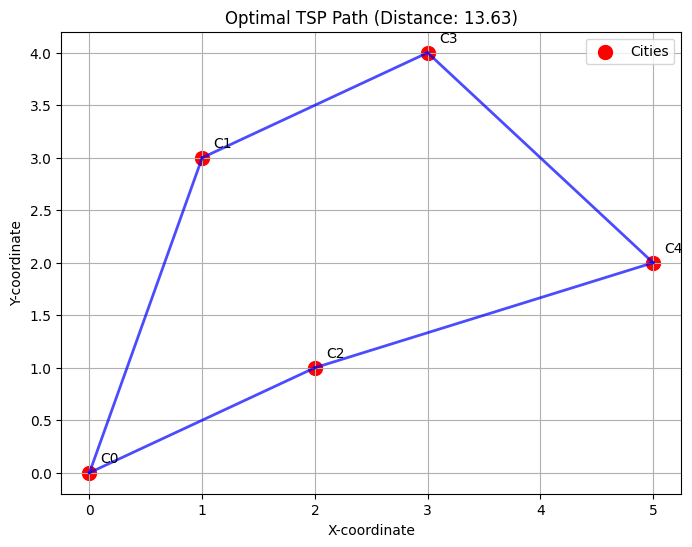

In [3]:
import matplotlib.pyplot as plt

# Extract x and y coordinates of cities
city_x = [city[0] for city in cities]
city_y = [city[1] for city in cities]

plt.figure(figsize=(8, 6))

# 2. Create a scatter plot of the cities
plt.scatter(city_x, city_y, color='red', marker='o', s=100, label='Cities')

# Annotate city indices
for i, (x, y) in enumerate(cities):
    plt.annotate(f'C{i}', (x + 0.1, y + 0.1), fontsize=10)

# 3. Plot the optimal path
# The optimal_path includes the start city twice (start -> ... -> end -> start)
# So, iterate through num_cities to draw lines between consecutive cities in the path
for i in range(len(optimal_path) - 1):
    start_city_idx = optimal_path[i]
    end_city_idx = optimal_path[i+1]
    plt.plot(
        [cities[start_city_idx][0], cities[end_city_idx][0]],
        [cities[start_city_idx][1], cities[end_city_idx][1]],
        color='blue', linestyle='-', linewidth=2, alpha=0.7
    )

# Plot the returning path to the start city (last segment of the path)
# The loop above already handles this because optimal_path[len(optimal_path)-1] is the start city index
# and optimal_path[len(optimal_path)-2] is the last city visited before returning.

# 4. Add labels for the x and y axes
plt.xlabel('X-coordinate')
plt.ylabel('Y-coordinate')

# 5. Add a title to the plot
plt.title(f'Optimal TSP Path (Distance: {min_distance:.2f})')

# 6. Add a legend
plt.legend()

# 7. Display the plot
plt.grid(True)
plt.show()


## Final Task

### Subtask:
Summarize the implementation, discuss the limitations of the brute-force approach, and suggest potential next steps for handling a larger number of cities (e.g., mentioning dynamic programming, approximation algorithms, or metaheuristics like genetic algorithms).


## Summary:

### Q&A

**1. Summarize the implementation of the Traveling Salesman Problem (TSP) using a brute-force approach.**
The implementation involved three main steps:
*   **City and Distance Representation:** Cities were defined as (x, y) coordinates. The Euclidean distance function was used to calculate the distance between any two cities, and these distances were stored in a symmetric distance matrix.
*   **Brute-Force Algorithm:** A Python function `solve_tsp_bruteforce` was created using `itertools.permutations`. This function generated all possible permutations of visiting cities (excluding the fixed starting city to avoid redundant calculations). For each permutation, the total path distance (including the return to the starting city) was calculated. The permutation resulting in the minimum total distance was identified as the optimal path.
*   **Visualization:** `matplotlib.pyplot` was used to visualize the cities as scatter points and the optimal path as connected lines, complete with labels, a title showing the total distance, and a legend for clarity.

**2. Discuss the limitations of the brute-force approach.**
The brute-force approach for TSP involves checking every possible path. For a problem with \(N\) cities, there are \((N-1)!\) possible unique paths (if the starting city is fixed). This factorial growth rate means that as the number of cities increases, the computational time required grows extremely rapidly, making it impractical for even a moderate number of cities. For example, with only 5 cities, it calculates \(4! = 24\) permutations, which is manageable. However, for 10 cities, it would be \(9! = 362,880\) permutations, and for 20 cities, it becomes an astronomically large number (over \(2.4 \times 10^{17}\) permutations), far exceeding practical computational limits.

**3. Suggest potential next steps for handling a larger number of cities (e.g., mentioning dynamic programming, approximation algorithms, or metaheuristics like genetic algorithms).**
For handling a larger number of cities in TSP, several more efficient approaches can be considered:
*   **Dynamic Programming (e.g., Held-Karp algorithm):** This approach can solve TSP optimally, but its time complexity is \(O(N^2 2^N)\), which is better than brute-force but still exponential and thus limited to a few dozen cities.
*   **Approximation Algorithms:** These algorithms do not guarantee an optimal solution but provide a solution within a guaranteed factor of the optimal one in polynomial time. Examples include Nearest Neighbor, Christofides algorithm, or Minimum Spanning Tree-based approaches.
*   **Metaheuristics:** These are heuristic methods designed to find sufficiently good solutions to optimization problems in a reasonable amount of time, even for very large instances, without guaranteeing optimality. Examples include:
    *   **Genetic Algorithms:** Inspired by natural selection, they evolve a population of candidate solutions over generations.
    *   **Simulated Annealing:** A probabilistic technique for approximating the global optimum of a given function.
    *   **Ant Colony Optimization:** Inspired by the foraging behavior of ants.
    *   **Tabu Search:** A metaheuristic search method that employs a "tabu list" of previously visited solutions to avoid cycles and explore new areas of the search space.

### Data Analysis Key Findings

*   **City Representation and Distance Calculation:** Cities were successfully defined as (x, y) coordinates, e.g., `[(0, 0), (1, 3), (2, 1), (3, 4), (5, 2)]`. The Euclidean distance function was correctly implemented and used to populate a 5x5 distance matrix, where diagonal elements are 0.0.
*   **Optimal Path and Distance for Example Data:** For the given 5 cities, the brute-force algorithm successfully identified the optimal path as `[0, 1, 3, 4, 2, 0]` with a minimum total distance of approximately `13.63`.
*   **Visualization Confirmation:** The optimal path and city locations were clearly visualized using `matplotlib`, with appropriate labels, title, and legend, confirming the derived solution.

### Insights or Next Steps

*   **Computational Scalability:** The brute-force approach is only feasible for a very small number of cities due to its factorial time complexity. For practical applications involving more than 10-12 cities, alternative algorithms are essential.
*   **Explore Advanced Algorithms:** The next logical step is to implement and compare more scalable algorithms like the Held-Karp dynamic programming approach for moderately sized problems or metaheuristics (e.g., Genetic Algorithms, Simulated Annealing) for larger, real-world TSP instances where near-optimal solutions are acceptable.
